In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from pyecharts.charts import Map, Geo
from pyecharts import options as opts
from scipy.stats import ks_2samp
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [10]:
#读入数据
data=pd.read_csv(r"C:\\Users\\liueh\\Desktop\\multivariate\\final\\fifa19.csv")
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
4,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
5,6,177003,L. Modri?,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84,60,76,73,13,9,7,14,9,€137.4M
6,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85,62,45,38,27,25,31,33,37,€164M
7,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82,87,92,91,11,8,9,7,11,€104.6M
8,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,86,34,42,19,15,6,12,8,10,€127.1M
9,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85,72,79,69,10,11,13,7,10,€156.8M


In [11]:
#数据清理
length=len(data)

#weight
def convert_weight(var):
    """
    convert the string number to a float
    _ 去除lbs单位
    """
    new_value = var.replace("lbs","")
    return float(new_value)
data['Weight']=data["Weight"].apply(convert_weight)



#wage
def convert_wage(var):
    """
    convert the string number to a float
    - 删去$和K
    """
    new_value = var.replace("$","").replace("K","000").replace("€","")
    return float(new_value)
data['Wage']=data["Wage"].apply(convert_wage)

#height
def convert_height(var):
    """
    convert the string number to a float
    - 转化为浮点数类型
    - 转化为厘米为单位
    """
    temp1=var[0]
    temp2=var[2]
    new_value =float(temp1)*30.48+float(temp2)*2.54
    return new_value
data['Height']=data["Height"].apply(convert_height)
data['Height']

0        170.18
1        187.96
2        175.26
3        154.94
4        172.72
5        172.72
6        182.88
7        182.88
8        182.88
9        182.88
10       187.96
11       172.72
12       167.64
13       154.94
14       187.96
15       175.26
16       187.96
17       185.42
18       172.72
19       187.96
20       154.94
21       175.26
22       185.42
23       154.94
24       162.56
25       175.26
26       154.94
27       172.72
28       187.96
29       190.50
          ...  
18111    154.94
18112    182.88
18113    187.96
18114    185.42
18115    154.94
18116    154.94
18117    187.96
18118    185.42
18119    154.94
18120    154.94
18121    154.94
18122    154.94
18123    154.94
18124    175.26
18125    154.94
18126    185.42
18127    172.72
18128    190.50
18129    172.72
18130    170.18
18131    154.94
18132    154.94
18133    167.64
18134    175.26
18135    185.42
18136    175.26
18137    190.50
18138    172.72
18139    154.94
18140    154.94
Name: Height, Length: 18

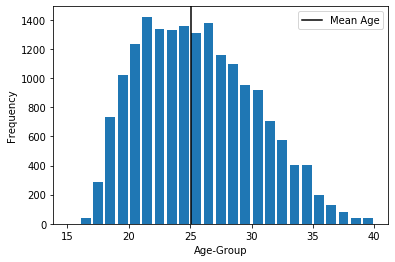

In [12]:
#player's physical traits_age hitograms
group=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
plt.hist(data['Age'], group, histtype='bar', rwidth=0.8)
plt.axvline(25.1,color='black',label='Mean Age')
plt.legend()
plt.xlabel("Age-Group")
plt.ylabel("Frequency")
plt.savefig('age.jpg')

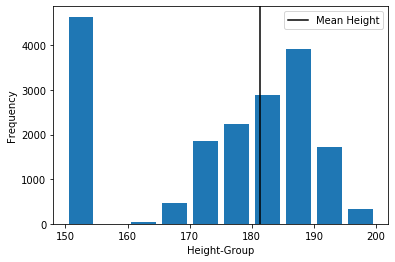

In [14]:
#player's physical traits_height hitograms
group=[150,155,160,165,170,175,180,185,190,195,200]
plt.hist(data['Height'],group,histtype='bar', rwidth=0.8)
plt.axvline(181.3,color='black',label='Mean Height')
plt.legend()
plt.xlabel("Height-Group")
plt.ylabel("Frequency")
plt.savefig('weight.jpg')

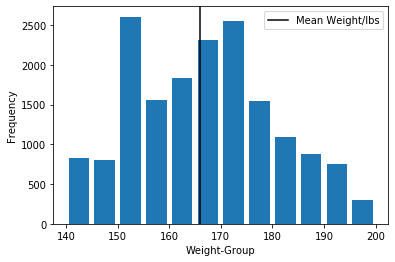

In [13]:
#player's physical traits_weight hitograms
group=[140,145,150,155,160,165,170,175,180,185,190,195,200]
plt.hist(data['Weight'],group,histtype='bar', rwidth=0.8)
plt.axvline(data['Weight'].mean(),color='black',label='Mean Weight/lbs')
plt.legend()
plt.xlabel("Weight-Group")
plt.ylabel("Frequency")
plt.savefig('height.jpg')

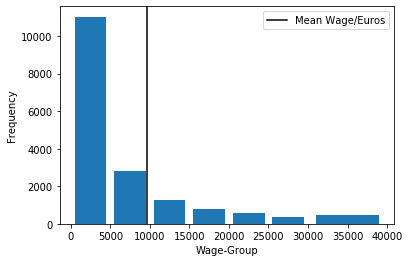

In [15]:
#player's physical traits_wage hitograms
group=[0,5000,10000,15000,20000,25000,30000,40000]
plt.hist(data['Wage'],group,histtype='bar', rwidth=0.8)
plt.axvline(data['Wage'].mean(),color='black',label='Mean Wage/Euros')
plt.legend()
plt.xlabel("Wage-Group")
plt.ylabel("Frequency")
plt.savefig('Wage.jpg')

In [8]:
#球员nationality
data.groupby('Nationality').count()
nationality=data.groupby('Nationality').count()['ID']
value=nationality.tolist()
attr=nationality.index.tolist()
def map_world() -> Map:
    c = (
        Map()
        .add("Most Popular Countries" ,[list(z) for z in zip(attr, nationality)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Player Distribution"),
            visualmap_opts=opts.VisualMapOpts(max_=200),)
        )
    return c
map_world().render_notebook()

In [18]:
forward=['RF', 'ST', 'LF', 'RS', 'RW', 'LS', 'LW', 'CF']
midfield=['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
defense=['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
position=data.groupby('Position')
#overall和potential均值比较
forwardmean_overall=0;
forwardmean_potential=0;
midfieldfmean_overall=0;
midfieldmean_potential=0;
defensemean_overall=0;
defensemean_potential=0;
for i in forward:
    forwardmean_overall=forwardmean_overall+position.get_group(i)['Overall'].mean()
    forwardmean_potential=forwardmean_potential+position.get_group(i)['Potential'].mean()
for i in midfield:
    midfieldfmean_overall=midfieldfmean_overall+position.get_group(i)['Overall'].mean()
    midfieldfmean_potential=midfieldfmean_potential+position.get_group(i)['Potential'].mean()
for i in defense:
    defensemean_overall=defensemean_overall+position.get_group(i)['Overall'].mean()
    defensemean_potential=defensemean_potential+position.get_group(i)['Potential'].mean()
forwardmean_overall=forwardmean_overall/8
forwardmean_potential=forwardmean_potential/8
midfieldfmean_overall=midfieldfmean_overall/11
midfieldfmean_potential=midfieldfmean_potential/11
defensemean_overall=defensemean_overall/7
defensemean_potential=defensemean_potential/7

NameError: name 'midfieldfmean_potential' is not defined

In [19]:
#总体比较-overall，k-s检验
forwardoverall=[]
for i in forward:
    forwardoverall=forwardoverall+position.get_group(i)['Overall'].tolist()
midfieldoverall=[]
for i in midfield:
    midfieldoverall=midfieldoverall+position.get_group(i)['Overall'].tolist()
defenseoverall=[]
for i in defense:
    defenseoverall=defenseoverall+position.get_group(i)['Overall'].tolist()
ks_2samp(forwardoverall, midfieldoverall)
ks_2samp(forwardoverall, defenseoverall)
ks_2samp(midfieldoverall, defenseoverall)
#得出结论，中场和后场的差别较大，前场中场与前场后场的评分差别不大

Ks_2sampResult(statistic=0.030693382590439744, pvalue=0.005083324320864677)

In [20]:
#总体比较-potential，k-s检验
forwardpotential=[]
for i in forward:
    forwardpotential=forwardpotential+position.get_group(i)['Potential'].tolist()
midfieldpotential=[]
for i in midfield:
    midfieldpotential=midfieldpotential+position.get_group(i)['Potential'].tolist()
defensepotential=[]
for i in defense:
    defensepotential=defensepotential+position.get_group(i)['Potential'].tolist()
ks_2samp(forwardpotential, midfieldpotential)
ks_2samp(forwardpotential, defensepotential)
ks_2samp(midfieldpotential, defensepotential)

Ks_2sampResult(statistic=0.06716717223809066, pvalue=7.494068444878805e-13)

In [21]:
#一个典型的ST是什么样子的，多元线性回归
st=position.get_group('ST')
head=['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']
stdata=st[head]#把st中的分数放进去啦
pca=PCA(n_components=5)
stdata_p=pca.fit(stdata).transform(stdata)
print('各主成分贡献度：{}'.format(pca.explained_variance_ratio_))

各主成分贡献度：[0.41059418 0.14284825 0.07392894 0.06399316 0.03611889]


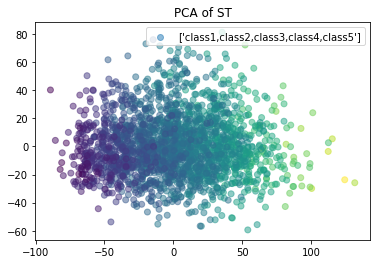

In [22]:
plt.figure()
plt.scatter(stdata_p[:,0],stdata_p[:,1],c=st['Overall'],alpha=0.5,label=['class1,class2,class3,class4,class5'])
plt.legend()
plt.title('PCA of ST')
plt.savefig('PCA.jpg')

In [23]:
#对st进行多元回归分析
X_train,X_test,Y_train,Y_test=train_test_split(stdata,st['Overall'],train_size=0.8)
print("原始数据特征：",stdata.shape,
     "训练数据特征",X_train.shape,"测试数据特征:",X_test.shape)
print("原始数据标签：",st['Overall'].shape,"训练数据标签：",Y_train.shape,",测试数据标签:",Y_test.shape)

原始数据特征： (2152, 29) 训练数据特征 (1721, 29) 测试数据特征: (431, 29)
原始数据标签： (2152,) 训练数据标签： (1721,) ,测试数据标签: (431,)


In [26]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
intercept=model.intercept_
intercept

0.9606314808367102

In [28]:
coef=model.coef_
coef

array([ 7.15115826e-05,  1.79091524e-01,  9.54285223e-02,  5.49665378e-02,
        1.56562983e-02,  6.81529600e-02, -1.72001737e-04,  1.51394615e-03,
        1.40567214e-03,  1.07848170e-01,  3.89300274e-02,  5.13327424e-02,
       -3.28793242e-03,  8.66084955e-02,  2.09891739e-04,  9.99240064e-02,
       -1.42717871e-03, -1.41826415e-03,  4.85564997e-02,  2.54609791e-02,
        8.75426737e-04, -1.74186000e-03,  1.31649252e-01,  3.50163900e-04,
        1.25727855e-04,  3.20729511e-05,  1.86396607e-03, -8.39104104e-04,
        2.02364099e-03])

In [115]:
score=model.score(X_test,Y_test)
score

0.9942298750624823

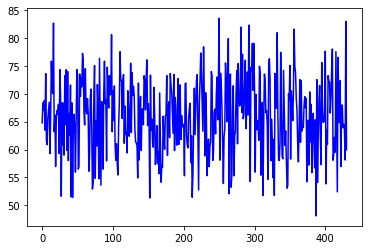

In [30]:
y_pred=model.predict(X_test)
plt.plot(range(len(y_pred)),y_pred,'b',label='predict')
plt.savefig('predict.jpg')
plt.show()

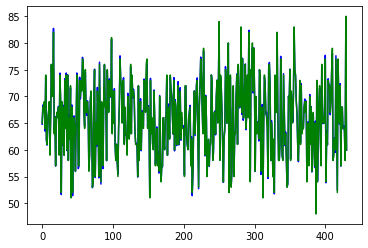

In [31]:
y_pred=model.predict(X_test)
plt.plot(range(len(y_pred)),y_pred,'b',label='predict')
plt.plot(range(len(Y_test)),Y_test,'g',label='test')
plt.savefig('ROC.jpg')
plt.show()

In [45]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
print('线性回归模型的平均绝对误差为：',
     mean_absolute_error(Y_test,y_pred))
print('线性回归模型的均方误差为：',
     mean_squared_error(Y_test,y_pred))
print('线性回归模型的中值绝对误差为：',
     median_absolute_error(Y_test,y_pred))
print('线性回归模型的可解释方差值为：',
     explained_variance_score(Y_test,y_pred))
print('线性回归模型的R方值为：',
     r2_score(Y_test,y_pred))

线性回归模型的平均绝对误差为： 7.467090613518485
线性回归模型的均方误差为： 85.1213131032231
线性回归模型的中值绝对误差为： 6.281886670025855
线性回归模型的可解释方差值为： -0.803901822342604
线性回归模型的R方值为： -0.8107510118475685


In [32]:
newhead=['Finishing','BallControl','Positioning','ShotPower','HeadingAccuracy']
newst=st[newhead]
X_train1,X_test1,Y_train1,Y_test1=train_test_split(newst,st['Overall'],train_size=0.8)
print("原始数据特征：",newst.shape,
     "训练数据特征",X_train1.shape,"测试数据特征:",X_test1.shape)
print("原始数据标签：",st['Overall'].shape,"训练数据标签：",Y_train1.shape,",测试数据标签:",Y_test1.shape)

原始数据特征： (2152, 5) 训练数据特征 (1721, 5) 测试数据特征: (431, 5)
原始数据标签： (2152,) 训练数据标签： (1721,) ,测试数据标签: (431,)


In [33]:
model1=LinearRegression()
model1.fit(X_train1,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
score=model1.score(X_test1,Y_test1)
score

0.9611331920631383

In [35]:
intercept=model1.intercept_
intercept

7.93924223006173

In [36]:
coef=model1.coef_
coef

array([0.20066551, 0.26121069, 0.19437597, 0.174667  , 0.05528923])

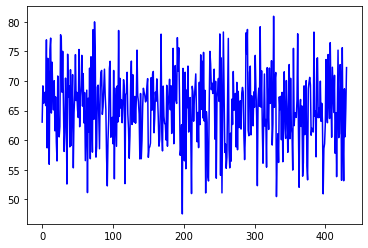

In [46]:
y_pred1=model1.predict(X_test1)
plt.plot(range(len(y_pred1)),y_pred1,'b',label='predict')

plt.show()

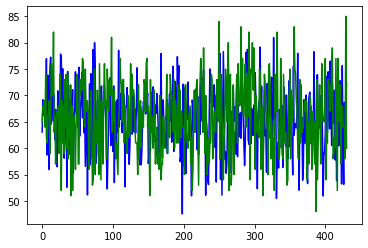

In [47]:
y_pred=model1.predict(X_test1)
plt.plot(range(len(y_pred1)),y_pred,'b',label='predict')
plt.plot(range(len(Y_test1)),Y_test,'g',label='test')
plt.savefig('ROC.jpg')
plt.show()

In [44]:
print('线性回归模型的平均绝对误差为：',
     mean_absolute_error(Y_test1,y_pred1))
print('线性回归模型的均方误差为：',
     mean_squared_error(Y_test1,y_pred1))
print('线性回归模型的中值绝对误差为：',
     median_absolute_error(Y_test1,y_pred1))
print('线性回归模型的可解释方差值为：',
     explained_variance_score(Y_test1,y_pred1))
print('线性回归模型的R方值为：',
     r2_score(Y_test1,y_pred1))

线性回归模型的平均绝对误差为： 0.9956236291679991
线性回归模型的均方误差为： 1.601771705403316
线性回归模型的中值绝对误差为： 0.8394100235576616
线性回归模型的可解释方差值为： 0.9612388401986917
线性回归模型的R方值为： 0.9611331920631383


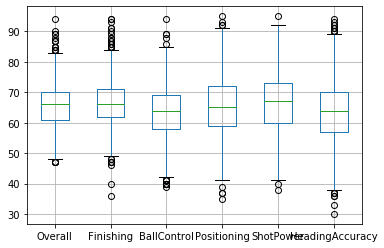

In [43]:
newhead1=['Overall','Finishing','BallControl','Positioning','ShotPower','HeadingAccuracy']
newst1=st[newhead1]
newst1.boxplot()
plt.savefig('Wage.jpg')

In [148]:
newst1.corr()

,Overall,Finishing,BallControl,Positioning,ShotPower,HeadingAccuracy
Overall,1.000000,0.904036,0.899181,0.906576,0.878044,0.708297
Finishing,0.904036,1.000000,0.791070,0.829147,0.766372,0.673758
BallControl,0.899181,0.791070,1.000000,0.787920,0.757434,0.523878
Positioning,0.906576,0.829147,0.787920,1.000000,0.756937,0.660988
ShotPower,0.878044,0.766372,0.757434,0.756937,1.000000,0.644439
HeadingAccuracy,0.708297,0.673758,0.523878,0.660988,0.644439,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


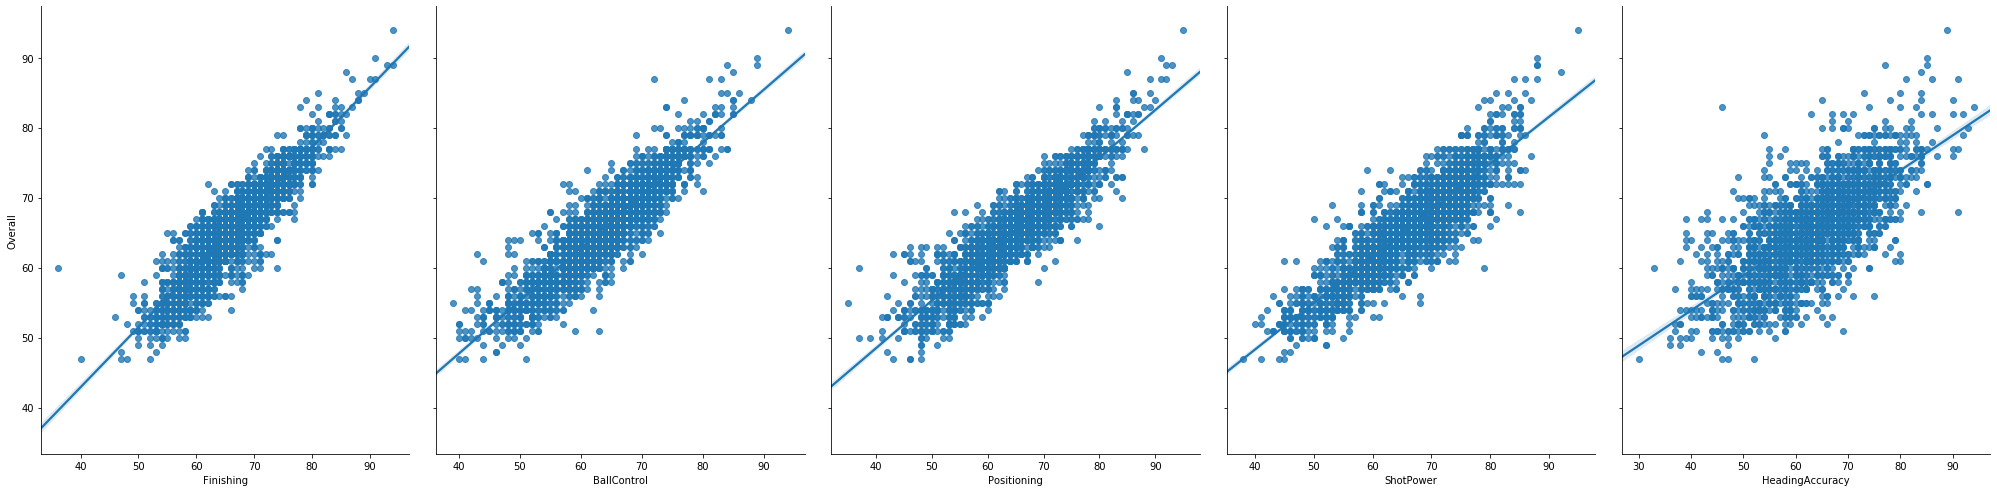

In [149]:
sns.pairplot(newst1, x_vars=['Finishing','BallControl','Positioning','ShotPower','HeadingAccuracy'], y_vars='Overall', size=7, aspect=0.8,kind = 'reg')